In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Data Reading Process

In [3]:
data = pd.read_csv('data/emissions_by_fuel.csv', encoding='cp1252')

C:\Users\Matthew\AppData\Local\Temp\ipykernel_22592\1300100405.py:1: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/emissions_by_fuel.csv', encoding='cp1252')


In [22]:
data.shape

(300397, 10)

### Data Cleaning Process

In [4]:
cols = ['FRS Id', 'Primary NAICS Code', 'Industry Type (subparts)', 'Unit Name', 'Other Fuel Name', 'Blend Fuel Name']

In [5]:

data.drop(cols, axis=1, inplace=True)

In [6]:
data.rename(columns={
    'Industry Type (sectors)' : 'Industry Type'
}, inplace=True)

### Data Transformation

##### Questions to Answer:
- How much emissions of Fuel Methane and Fuel Nitrous Oxide is emitted from 2010 to 2022?
- Fuel Emission of CH4 and N20 Fuel by General Type.
- Correlation of fuel emissions by each city states.

##### Fuel Emissions from 2010 to 2022

In [7]:
fuel = data[['Reporting Year', 'Fuel Methane (CH4) emissions (mt CO2e)', 'Fuel Nitrous Oxide (N2O) emissions (mt CO2e)', 'General Fuel Type']].sort_values(by='Reporting Year')
fuel.set_index('Reporting Year', inplace=True)
fuelS = fuel.groupby('Reporting Year')[['Fuel Methane (CH4) emissions (mt CO2e)','Fuel Nitrous Oxide (N2O) emissions (mt CO2e)']].sum()
fuelM = fuel.groupby('Reporting Year')[['Fuel Methane (CH4) emissions (mt CO2e)','Fuel Nitrous Oxide (N2O) emissions (mt CO2e)']].mean()
fuelX = fuel.groupby('Reporting Year')[['Fuel Methane (CH4) emissions (mt CO2e)','Fuel Nitrous Oxide (N2O) emissions (mt CO2e)']].max()
fuelD = fuel.groupby('Reporting Year')[['Fuel Methane (CH4) emissions (mt CO2e)','Fuel Nitrous Oxide (N2O) emissions (mt CO2e)']].median()

Text(0.5, 1.0, 'Median Fuel Emission')

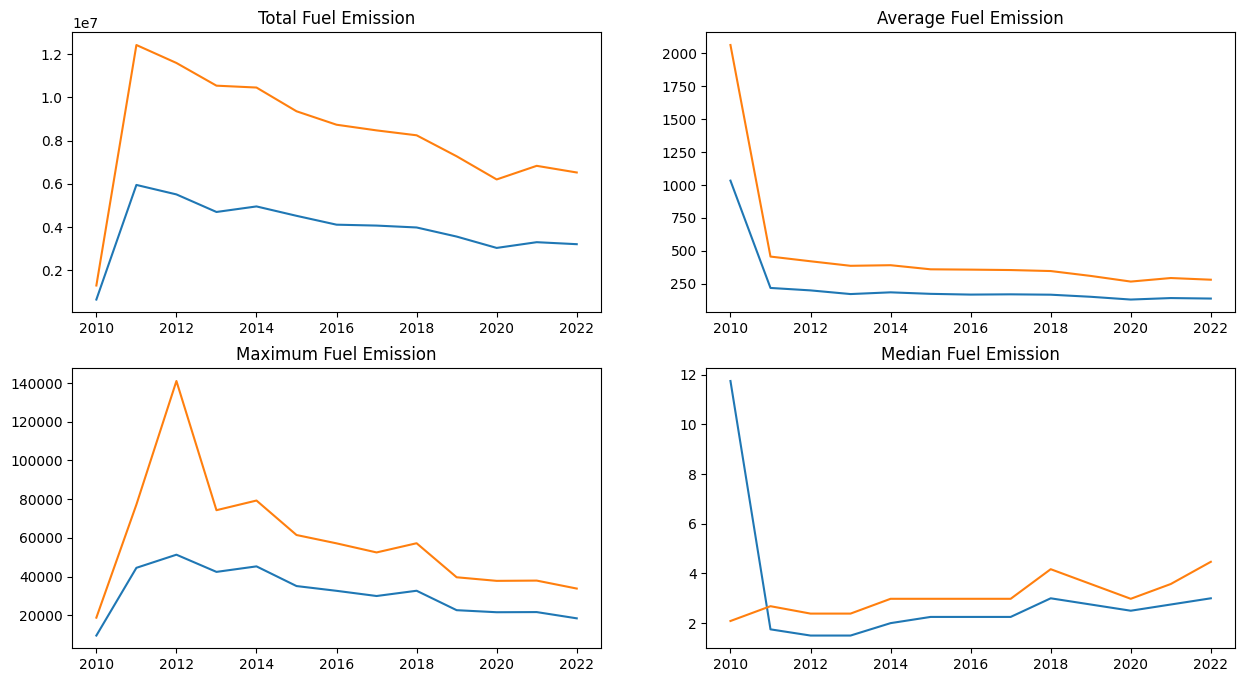

In [8]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(2,2,1)
ax1.plot(fuelS)
ax1.set_title('Total Fuel Emission')
ax2 = fig.add_subplot(2,2,2)
ax2.plot(fuelM)
ax2.set_title('Average Fuel Emission')
ax3 = fig.add_subplot(2,2,3)
ax3.plot(fuelX)
ax3.set_title('Maximum Fuel Emission')
ax4 = fig.add_subplot(2,2,4)
ax4.plot(fuelD)
ax4.set_title('Median Fuel Emission')

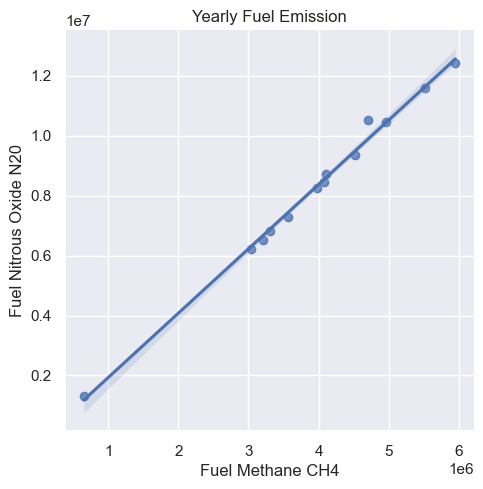

In [62]:
sns.set_theme()

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=fuelS,
    x="Fuel Methane (CH4) emissions (mt CO2e)", y="Fuel Nitrous Oxide (N2O) emissions (mt CO2e)",
    height=5
).set(title='Yearly Fuel Emission')

# Use more informative axis labels than are provided by default
g.set_axis_labels("Fuel Methane CH4", "Fuel Nitrous Oxide N20")

##### Fuel Emission of CH4 and N20 Fuel by General Type

In [9]:
data.head()

,Facility Id,Facility Name,City,State,Reporting Year,Industry Type,General Fuel Type,Specific Fuel Type,Fuel Methane (CH4) emissions (mt CO2e),Fuel Nitrous Oxide (N2O) emissions (mt CO2e)
0,1012147,17Z Gas Plant - Chevron USA Inc.,McKittrick,CA,2018,"Natural Gas and Natural Gas Liquids Suppliers,...",Natural Gas,Natural Gas (Weighted U.S. Average),1.50,1.788
1,1012147,17Z Gas Plant - Chevron USA Inc.,McKittrick,CA,2018,"Natural Gas and Natural Gas Liquids Suppliers,...",Natural Gas,Natural Gas (Weighted U.S. Average),0.00,0.000
2,1012147,17Z Gas Plant - Chevron USA Inc.,McKittrick,CA,2018,"Natural Gas and Natural Gas Liquids Suppliers,...",Natural Gas,Natural Gas (Weighted U.S. Average),0.00,0.000
3,1012147,17Z Gas Plant - Chevron USA Inc.,McKittrick,CA,2017,"Natural Gas and Natural Gas Liquids Suppliers,...",Natural Gas,Natural Gas (Weighted U.S. Average),4.25,5.066
4,1012147,17Z Gas Plant - Chevron USA Inc.,McKittrick,CA,2016,"Natural Gas and Natural Gas Liquids Suppliers,...",Natural Gas,Natural Gas (Weighted U.S. Average),4.75,5.662


In [10]:
data['Facility Id'].nunique()

7803

In [64]:
fuelFacilities = data.groupby('General Fuel Type', as_index=False)['Facility Id'].agg([
    ('Facilities under Utilization', 'nunique')
])
fuelFacilities.sort_values(by='Facilities under Utilization', ascending=False, inplace=True)
fuelFacilities.replace('Natural Gas', 'Natural Gas', inplace=True)
fuelFacilities

,General Fuel Type,Facilities under Utilization
3,Natural Gas,6831
6,Petroleum Products,3420
5,Other,1285
1,Coal,947
2,Fuel Gas,5
0,Biomass,2
4,Natural Gas,1
7,Solid Byproducts,1


[Text(0.5, 1.0, 'General Fuel Type Usage by Number of Facilities')]

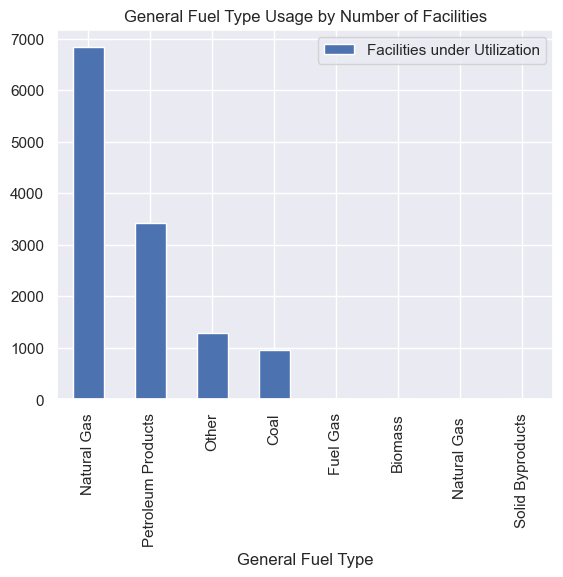

In [65]:
fuelFacilities.plot(x='General Fuel Type' ,kind='bar').set(title='General Fuel Type Usage by Number of Facilities')

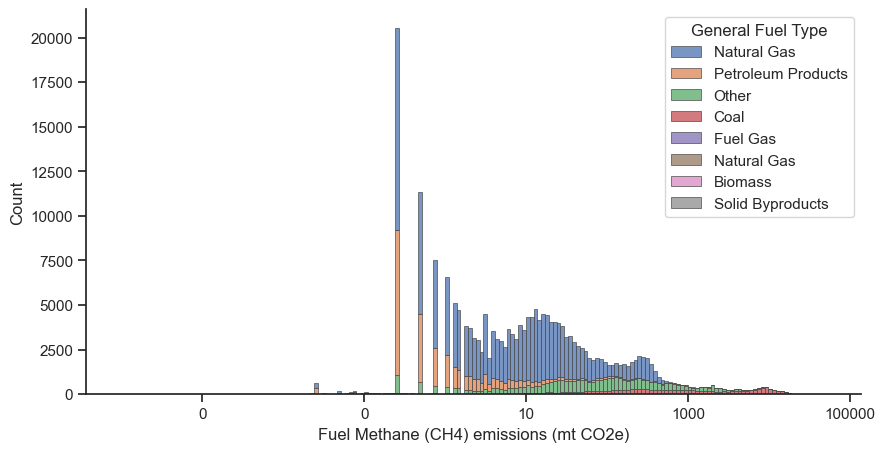

In [66]:
import matplotlib as mpl

sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(10, 5))
sns.despine(f)

sns.histplot(
    data,
    x="Fuel Methane (CH4) emissions (mt CO2e)", hue="General Fuel Type",
    multiple="stack",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())

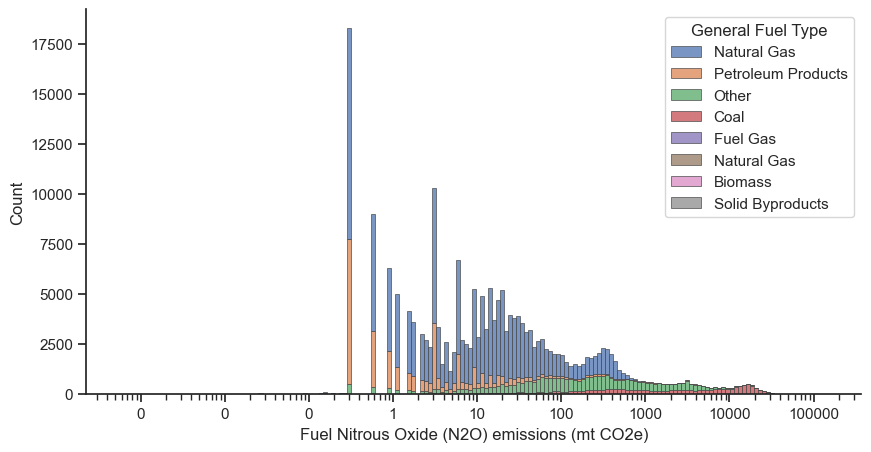

In [23]:
import matplotlib as mpl

sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(10, 5))
sns.despine(f)

sns.histplot(
    data,
    x="Fuel Nitrous Oxide (N2O) emissions (mt CO2e)", hue="General Fuel Type",
    multiple="stack",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())

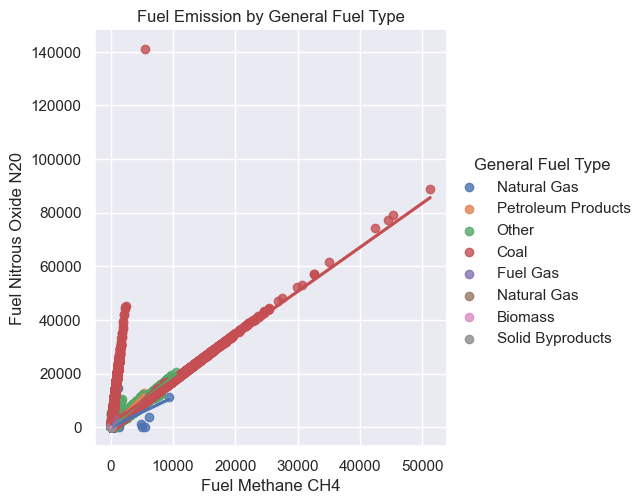

In [57]:
sns.set_theme()

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=data,
    x="Fuel Methane (CH4) emissions (mt CO2e)", y="Fuel Nitrous Oxide (N2O) emissions (mt CO2e)", hue="General Fuel Type",
    height=5
).set(title='Fuel Emission by General Fuel Type')

# Use more informative axis labels than are provided by default
g.set_axis_labels("Fuel Methane CH4", "Fuel Nitrous Oxide N20")

In [14]:
data.head()

,Facility Id,Facility Name,City,State,Reporting Year,Industry Type,General Fuel Type,Specific Fuel Type,Fuel Methane (CH4) emissions (mt CO2e),Fuel Nitrous Oxide (N2O) emissions (mt CO2e)
0,1012147,17Z Gas Plant - Chevron USA Inc.,McKittrick,CA,2018,"Natural Gas and Natural Gas Liquids Suppliers,...",Natural Gas,Natural Gas (Weighted U.S. Average),1.50,1.788
1,1012147,17Z Gas Plant - Chevron USA Inc.,McKittrick,CA,2018,"Natural Gas and Natural Gas Liquids Suppliers,...",Natural Gas,Natural Gas (Weighted U.S. Average),0.00,0.000
2,1012147,17Z Gas Plant - Chevron USA Inc.,McKittrick,CA,2018,"Natural Gas and Natural Gas Liquids Suppliers,...",Natural Gas,Natural Gas (Weighted U.S. Average),0.00,0.000
3,1012147,17Z Gas Plant - Chevron USA Inc.,McKittrick,CA,2017,"Natural Gas and Natural Gas Liquids Suppliers,...",Natural Gas,Natural Gas (Weighted U.S. Average),4.25,5.066
4,1012147,17Z Gas Plant - Chevron USA Inc.,McKittrick,CA,2016,"Natural Gas and Natural Gas Liquids Suppliers,...",Natural Gas,Natural Gas (Weighted U.S. Average),4.75,5.662


In [50]:
stateIn = data.groupby(['State', 'General Fuel Type'], as_index=False)['Facility Id'].nunique()
stateIn.rename(columns={'Facility Id' : 'Facilities per Industry Type'}, inplace=True)
stateIn.sort_values(by='Facilities per Industry Type', ascending=False)

,State,General Fuel Type,Facilities per Industry Type
184,TX,Natural Gas,1019
77,LA,Natural Gas,486
17,CA,Natural Gas,417
161,PA,Natural Gas,317
147,OH,Natural Gas,273
...,...,...,...
164,PA,Solid Byproducts,1
141,NY,Fuel Gas,1
160,PA,Fuel Gas,1
146,OH,Fuel Gas,1


In [16]:
stateIn.groupby('State', as_index=False)['Facilities per Industry Type'].sum()

,State,Facilities per Industry Type
0,AK,81
1,AL,193
2,AR,178
3,AZ,80
4,CA,478
5,CO,185
6,CT,54
7,DC,9
8,DE,22
9,FL,176


##### Correlation of Fuel Emission by City States

In [17]:
data.head()

,Facility Id,Facility Name,City,State,Reporting Year,Industry Type,General Fuel Type,Specific Fuel Type,Fuel Methane (CH4) emissions (mt CO2e),Fuel Nitrous Oxide (N2O) emissions (mt CO2e)
0,1012147,17Z Gas Plant - Chevron USA Inc.,McKittrick,CA,2018,"Natural Gas and Natural Gas Liquids Suppliers,...",Natural Gas,Natural Gas (Weighted U.S. Average),1.50,1.788
1,1012147,17Z Gas Plant - Chevron USA Inc.,McKittrick,CA,2018,"Natural Gas and Natural Gas Liquids Suppliers,...",Natural Gas,Natural Gas (Weighted U.S. Average),0.00,0.000
2,1012147,17Z Gas Plant - Chevron USA Inc.,McKittrick,CA,2018,"Natural Gas and Natural Gas Liquids Suppliers,...",Natural Gas,Natural Gas (Weighted U.S. Average),0.00,0.000
3,1012147,17Z Gas Plant - Chevron USA Inc.,McKittrick,CA,2017,"Natural Gas and Natural Gas Liquids Suppliers,...",Natural Gas,Natural Gas (Weighted U.S. Average),4.25,5.066
4,1012147,17Z Gas Plant - Chevron USA Inc.,McKittrick,CA,2016,"Natural Gas and Natural Gas Liquids Suppliers,...",Natural Gas,Natural Gas (Weighted U.S. Average),4.75,5.662


In [18]:
cityStateCH4 = pd.pivot_table(data, index='Reporting Year', columns='General Fuel Type', values='Fuel Methane (CH4) emissions (mt CO2e)')
cityStateCH4.fillna(0)

General Fuel Type,Biomass,Coal,Fuel Gas,Natural Gas,Natural Gas,Other,Petroleum Products,Solid Byproducts
Reporting Year,,,,,,,,
2010,0.0,0.000000,0.000,16.801435,0.000,3845.925595,7.915663,0.0
2011,0.0,2343.914904,0.000,22.139576,0.000,481.592703,9.391910,0.0
2012,0.0,2083.400652,0.000,24.520647,0.000,496.766471,7.603923,0.0
2013,0.0,2308.481821,0.000,22.726342,0.000,232.220499,8.182233,0.0
2014,0.0,2723.049477,0.000,23.867688,0.000,215.946067,5.806500,0.0
2015,0.0,2561.620096,0.000,26.043463,0.000,215.422863,5.462086,0.0
2016,0.0,2559.044673,0.000,27.827270,0.000,222.882921,5.112498,0.0
2017,0.0,2843.875351,21.750,27.510465,51.625,215.861741,6.214002,0.0
2018,2.0,2852.367502,9.500,30.507764,0.000,224.643228,5.727591,0.0


In [19]:
cityStateN20 = pd.pivot_table(data, index='Reporting Year', columns='General Fuel Type', values='Fuel Nitrous Oxide (N2O) emissions (mt CO2e)')
cityStateN20.fillna(0)

General Fuel Type,Biomass,Coal,Fuel Gas,Natural Gas,Natural Gas,Other,Petroleum Products,Solid Byproducts
Reporting Year,,,,,,,,
2010,0.000,0.000000,0.0000,3.171062,0.000,7715.214679,15.633631,0.0
2011,0.000,5265.916616,0.0000,26.627900,0.000,889.928506,20.953219,0.0
2012,0.000,4806.922366,0.0000,29.083948,0.000,922.159122,17.237845,0.0
2013,0.000,5351.277279,0.0000,28.130131,0.000,547.556118,18.751304,0.0
2014,0.000,5772.300910,0.0000,27.860689,0.000,555.152264,12.931959,0.0
2015,0.000,5327.810095,0.0000,31.011826,0.000,547.444264,12.377893,0.0
2016,0.000,5542.741000,0.0000,33.070150,0.000,553.138324,11.745865,0.0
2017,0.000,5982.509753,52.1500,33.069157,61.537,537.501020,14.816378,0.0
2018,2.384,6001.107005,21.6050,36.253766,0.000,557.994056,13.701378,0.0


[Text(0.5, 1.0, 'Yearly Fuel Emission of CH4')]

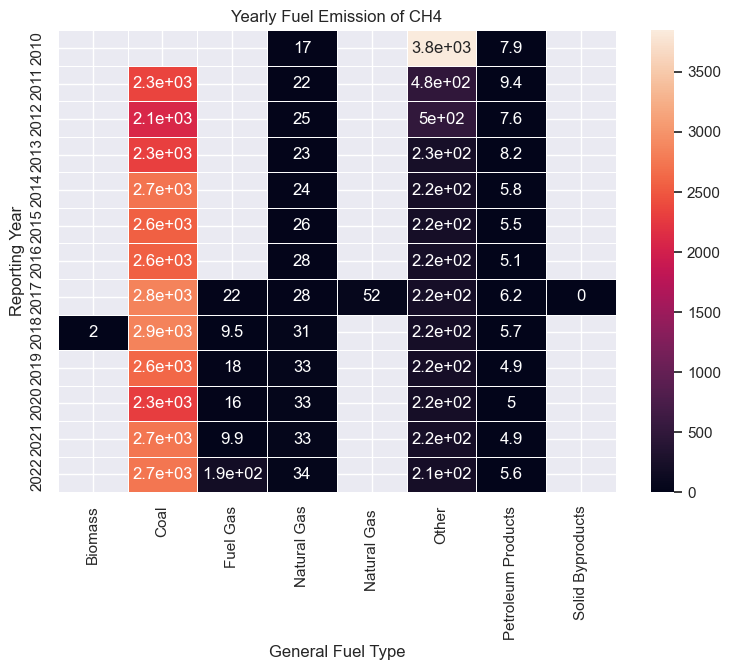

In [52]:
sns.set_theme()

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(cityStateCH4, annot=True, linewidths=.5, ax=ax).set(title='Yearly Fuel Emission of CH4')

[Text(0.5, 1.0, 'Yearly Fuel Emission of N20')]

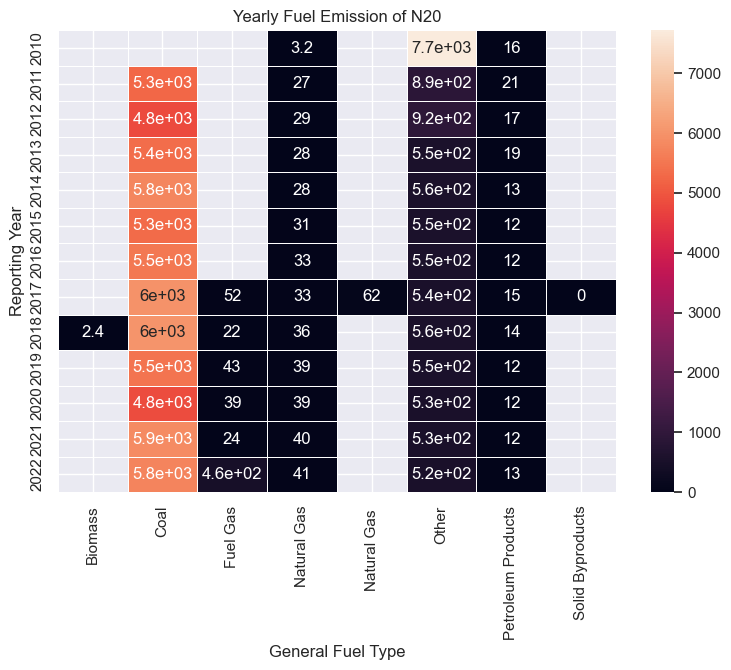

In [53]:
sns.set_theme()

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(cityStateN20, annot=True, linewidths=.5, ax=ax).set(title='Yearly Fuel Emission of N20')